# **Predicting the Productivity of Employees in the Garment Industry**

# **Introduction**

The garment industry, encompassing the production of diverse clothing items, stands as a trillion-dollar global enterprise  ([reference](https://fashionunited.com/global-fashion-industry-statistics)). This labor- and capital-intensive sector relies on the collective effort of workers to achieve productivity called workforce, a metric gauging the quantity of goods or services produced within a specific timeframe. Boosted productivity in a team is linked to higher profits, indicating effective use of resources in production. Hence, enhancing worker productivity is vital for the success of the garment industry.

## **Problem Statement**

 Build a model to Predict the productivity of garment manufacturing teams

 **Reason**
 Poor workforce productivity within a company can lead to lower profits, increased conflicts, higher employee turnover, and reduced motivation. Hence, it's essential for a company to monitor and predict its productivity levels, as well as investigate the factors influencing them.

## **Work Flow**


* Load and preview the dataset.

* Gain insights into the data.

* Data preparation - Identify outliers, anomalies, duplicates, missing values, and decide on appropriate handling methods.

* Perform univariate analysis, bivariate analysis, and modeling.

* Summarize findings and provide recommendations.

## **Data source and variable information**

I extract the dataset from UCI machine learning repository and can be accessed from ([here](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees))

Variables Info:

01	date			:	Date in MM-DD-YYYY.

02	day			:	Day of the Week.

03	quarter			:	A portion of the month. A month was divided into four quarters.

04	department		:	Associated department with the instance.

05	team_no			:	Associated team number with the instance.

06	no_of_workers		:	Number of workers in each team.

07	no_of_style_change	:	Number of changes in the style of a particular product.

08	targeted_productivity	:	Targeted productivity set by the Authority for each team for each day.

09	smv			:	Standard Minute Value, it is the allocated time for a task.

10	wip			:	Work in progress. Includes the number of unfinished items for products.

11	over_time		:	Represents the amount of overtime by each team in minutes.

12	incentive		:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

13	idle_time		:	The amount of time when the production was interrupted due to several reasons.

14	idle_men		:	The number of workers who were idle due to production interruption.

15	actual_productivity	:	The actual % of productivity that was delivered by the workers. It ranges from 0-1.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


## **Loading Data**

In [2]:
df = pd.read_csv("garments_worker_productivity.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
df.shape

(1197, 15)

## **Cleaning Data**

In [3]:
#renaming ambiguous columns
df = df.rename(columns={'wip': 'work_in_progress', 'smv':'std_minute_value'})

In [4]:
# seperating continuous and categorical variables
cat = ["quarter", "department", "day", "team", "no_of_style_change"]  # Although variables "team" and "no_of_style_change" have int data type but can be treated as categorical variable
cont = ["targeted_productivity", "std_minute_value", "work_in_progress", "over_time", "idle_men", "incentive", "idle_time", "no_of_workers", "actual_productivity"]

In [7]:
# checking for null values
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
std_minute_value           0
work_in_progress         506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [8]:
# As seen from above variable "work_in_ptogress" has missing values the normal convention is to fill this na values with mean
# but we will first check for skewness in order to fill with appropriate central tendency measure
df["work_in_progress"].skew()

9.741786273952965

In [9]:
# As the distribution of variable is skewed so we can use median to fill na values because median is not effected by skewness where mean does
# checking the median of work_in_progress
df.work_in_progress.median()

1039.0

In [5]:
# filling na values with median and again checking for null values
df['work_in_progress'].fillna(df['work_in_progress'].median(),inplace=True)
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
std_minute_value         0
work_in_progress         0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [11]:
# checking for duplicates
df.duplicated().sum()

0

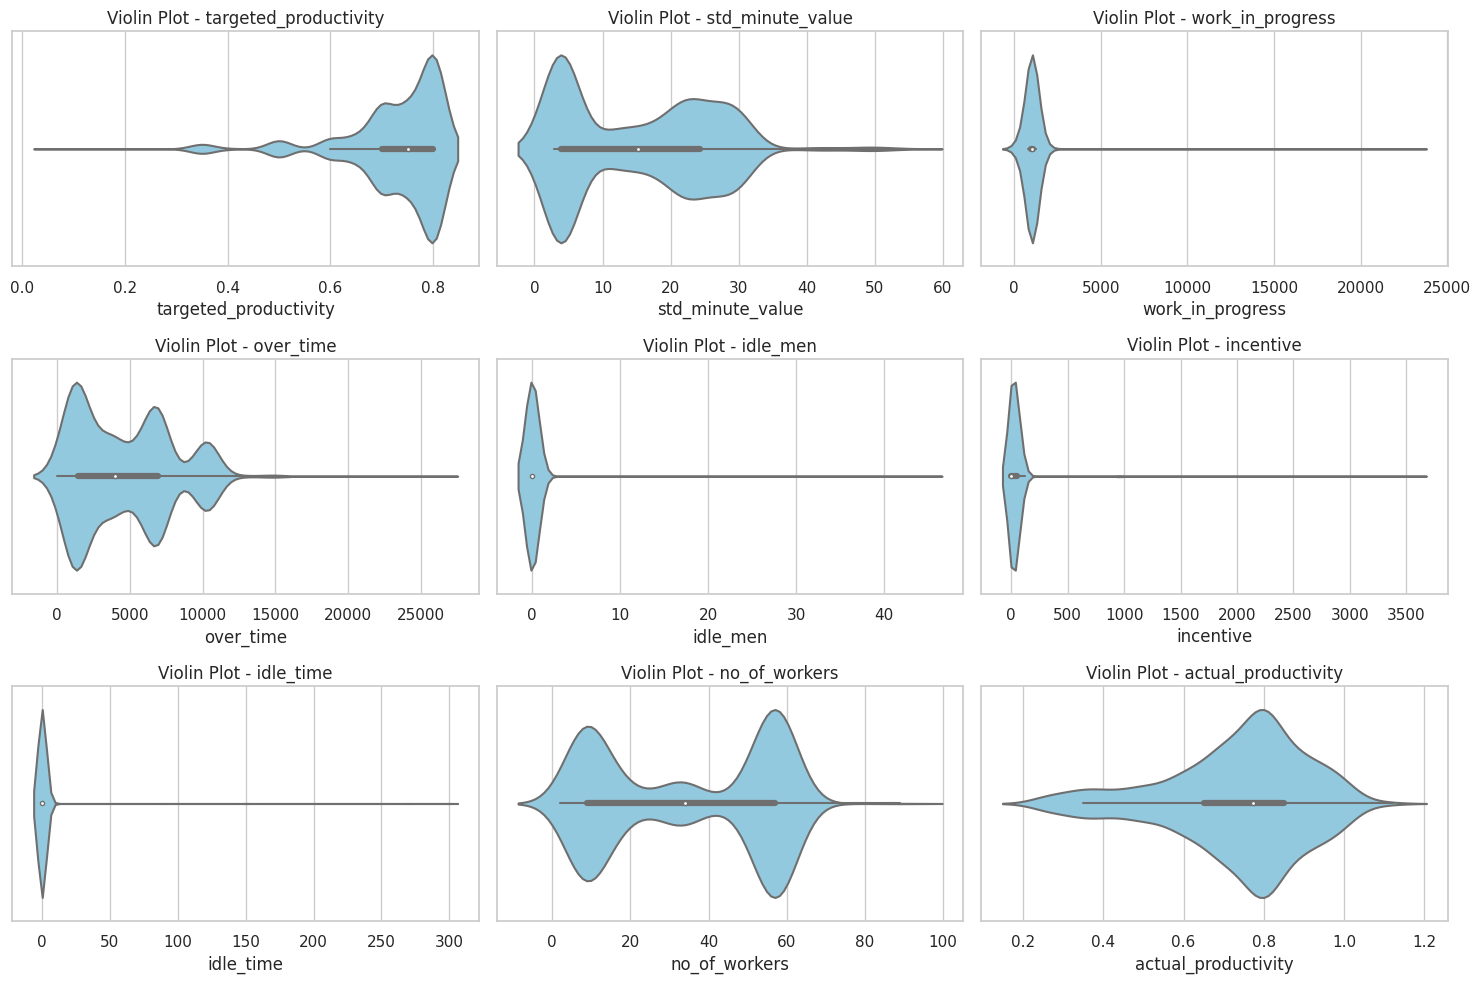

In [12]:
# checking for outliers graphically
# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots for each variable
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through the variables and create violin plots
for i, var in enumerate(cont):
    sns.violinplot(x=df[var], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Violin Plot - {var}')

# Adjust layout
plt.tight_layout()
plt.show()

Outliers observed in the columns such as targeted productivity, overtime, work in progress, incentive, idle time, idle men, and actual productivity will be retained, considering the possibility that these variations may stem from the inherent diversity in team workflows. It's acknowledged that certain teams may exhibit notable deviations in terms of time, pending tasks, and productivity, and such fluctuations can be attributed to the natural variability in team performance. Additionally, recognizing that team performance may fluctuate on different days, with some days showcasing considerable highs or lows, reinforces the decision not to remove these outliers. Aditionally the plots shows that some variables like targeted productivity, no of workers, over time have multimodal distribution(distribution with more than one peaks)...which we will explore later

In [13]:
#checking for anomlies in data
df.no_of_workers.unique()

array([59. ,  8. , 30.5, 56. , 57.5, 55. , 54. , 18. , 60. , 12. , 20. ,
       17. , 56.5, 54.5, 29.5, 31.5, 31. , 55.5, 58. , 10. , 16. , 32. ,
       58.5, 15. ,  5. , 57. , 53. , 51.5,  2. ,  9. ,  7. , 19. , 28. ,
       34. , 89. , 14. , 25. , 52. ,  4. , 21. , 35. , 51. , 33. , 11. ,
       33.5, 22. , 26. , 27. , 59.5, 50. , 44. , 49. , 47. , 48. , 42. ,
       24. , 45. , 46. , 39. , 38. ,  6. ])

In [6]:
# as no_workers should be a whole number so convertinh floats into integers
df['no_of_workers'] = df['no_of_workers'].apply(lambda x: int(x))
df["no_of_workers"].unique()

array([59,  8, 30, 56, 57, 55, 54, 18, 60, 12, 20, 17, 29, 31, 58, 10, 16,
       32, 15,  5, 53, 51,  2,  9,  7, 19, 28, 34, 89, 14, 25, 52,  4, 21,
       35, 33, 11, 22, 26, 27, 50, 44, 49, 47, 48, 42, 24, 45, 46, 39, 38,
        6])

In [9]:
#checking the categorical variable
for col in cat:
  print(col)
  print(df[col].unique())


  print('\n')

quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


department
['sweing' 'finishing ' 'finishing']


day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


team
[ 8  1 11 12  6  7  2  3  9 10  5  4]


no_of_style_change
[0 1 2]




In [10]:
# As mentioned in discription of data that it has 4 quarters so lets investigate it
df[df["quarter"] == "Quarter5"]

,date,quarter,department,day,team,targeted_productivity,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,1039.0,1200,0,0.0,0,0,10,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,1039.0,1200,0,0.0,0,0,10,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,1039.0,960,0,0.0,0,0,8,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,1039.0,960,0,0.0,0,0,8,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,1039.0,1200,0,0.0,0,0,10,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,1039.0,1200,0,0.0,0,0,10,0.853667


It appears that quarter5 was assigned to days of the month above 28. Since January cannot be divided into equal 4 quarters, 29th and 31st will be assigned to quarter 4.

In [7]:
# replace quarter5 (given jan date above 28) to quarter 4
df['quarter'] = df['quarter'].replace('Quarter5', 'Quarter4')

In [8]:
# removing the word quatrter from quarter column and leaving numbers
df['quarter'] = df['quarter'].str.extract('(\d+)').astype(int) # extract digit using regular expression

In [9]:
#confirming changes
print(df.quarter.unique())
print(df.quarter.dtype)

[1 2 3 4]
int64


In [10]:
# Correcting the spelling of sewing in the department column
df['department'] = df['department'].str.replace('sweing','sewing')

# Removing the spacing from the word finishing in the department column
df['department'] = df['department'].str.replace('finishing ','finishing')

#confirming changes
df['department'].unique()

array(['sewing', 'finishing'], dtype=object)

In [11]:
#datatype conversion

#date column to datetime

df['date'] = pd.to_datetime(df['date'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   int64         
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   std_minute_value       1197 non-null   float64       
 7   work_in_progress       1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [16]:
#saving cleaned data
df.to_csv('cleaned_productivity',index=False)

## **Univariate Analysis**

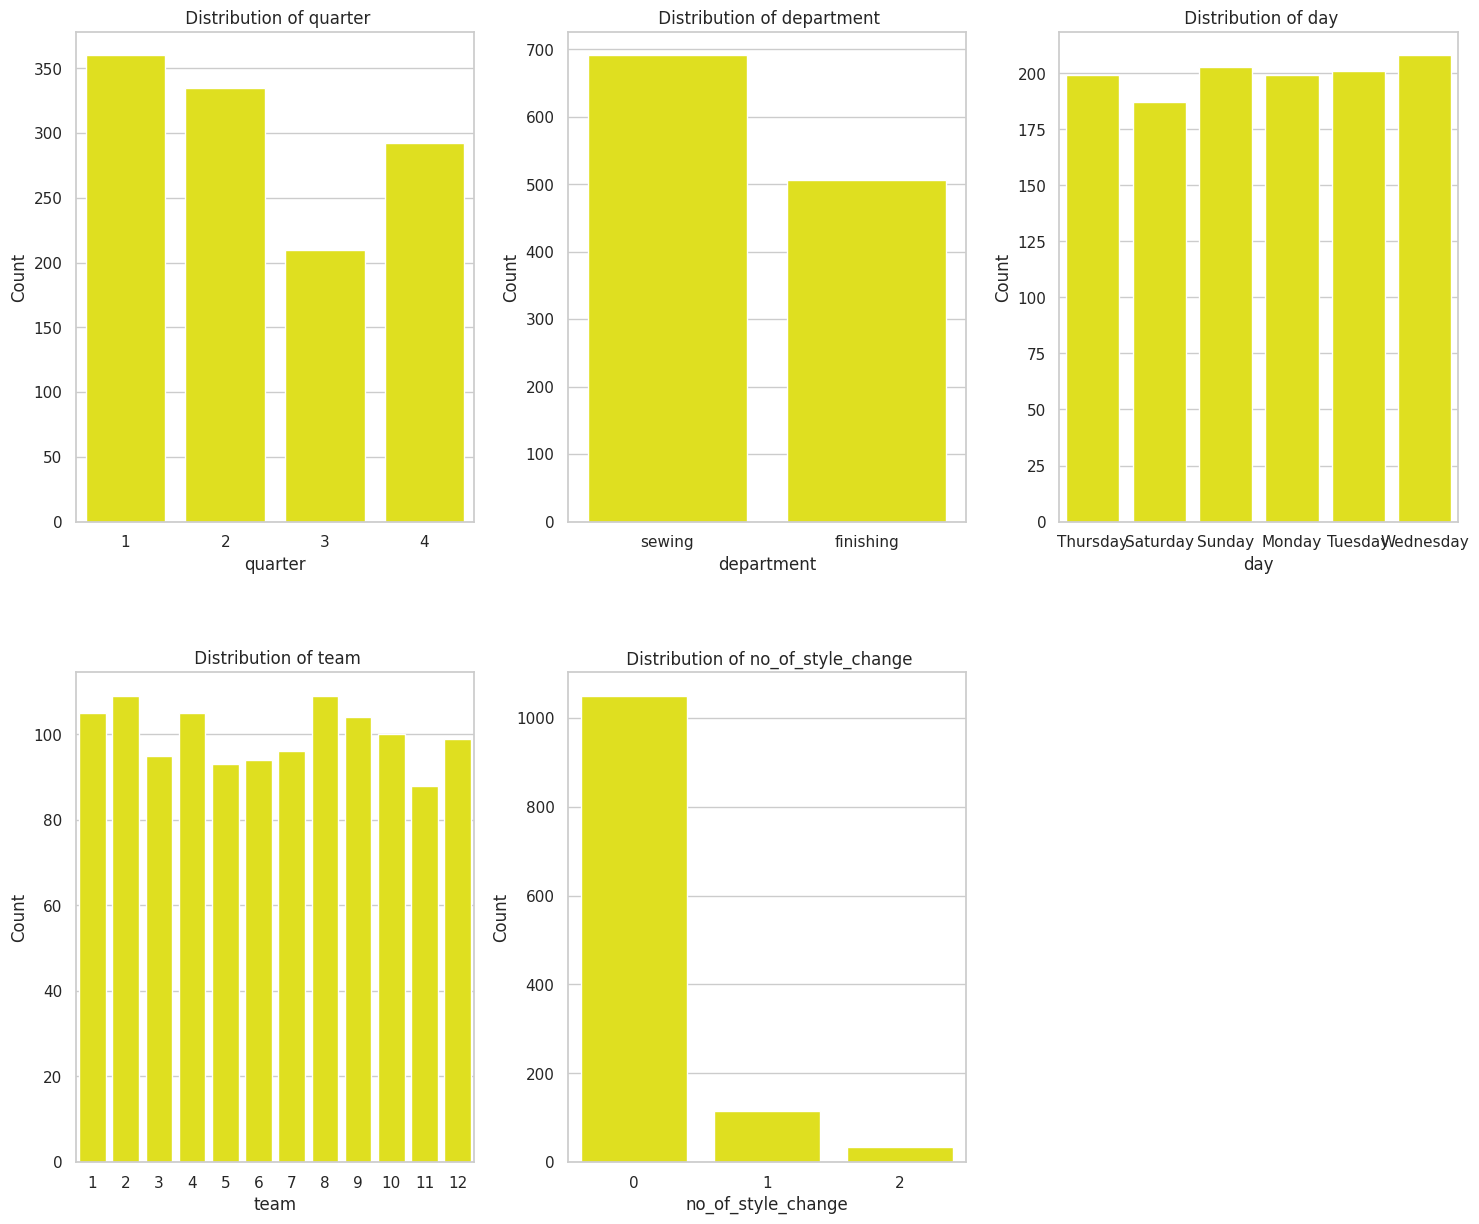

In [24]:
#countplots
fig,axes = plt.subplots(nrows=2, ncols=3,figsize=(15,8))

for i, ax in enumerate(axes.ravel()):
  if i < 5:
    sns.countplot(x=df[cat[i]], ax=ax, color="yellow")
    ax.set_title(f" Distribution of {cat[i]}")
    ax.set_xlabel(cat[i])
    ax.set_ylabel("Count")

fig.delaxes(axes[1, 2])
fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

**Observations**




*   Quarter 1 has most records
*   Sewing department has more records
*   Wednesday has more records compare to other days of the week
*   Team 2 and 8 appears more in the dataset
*   Most of the times there rae no changes in the style of product







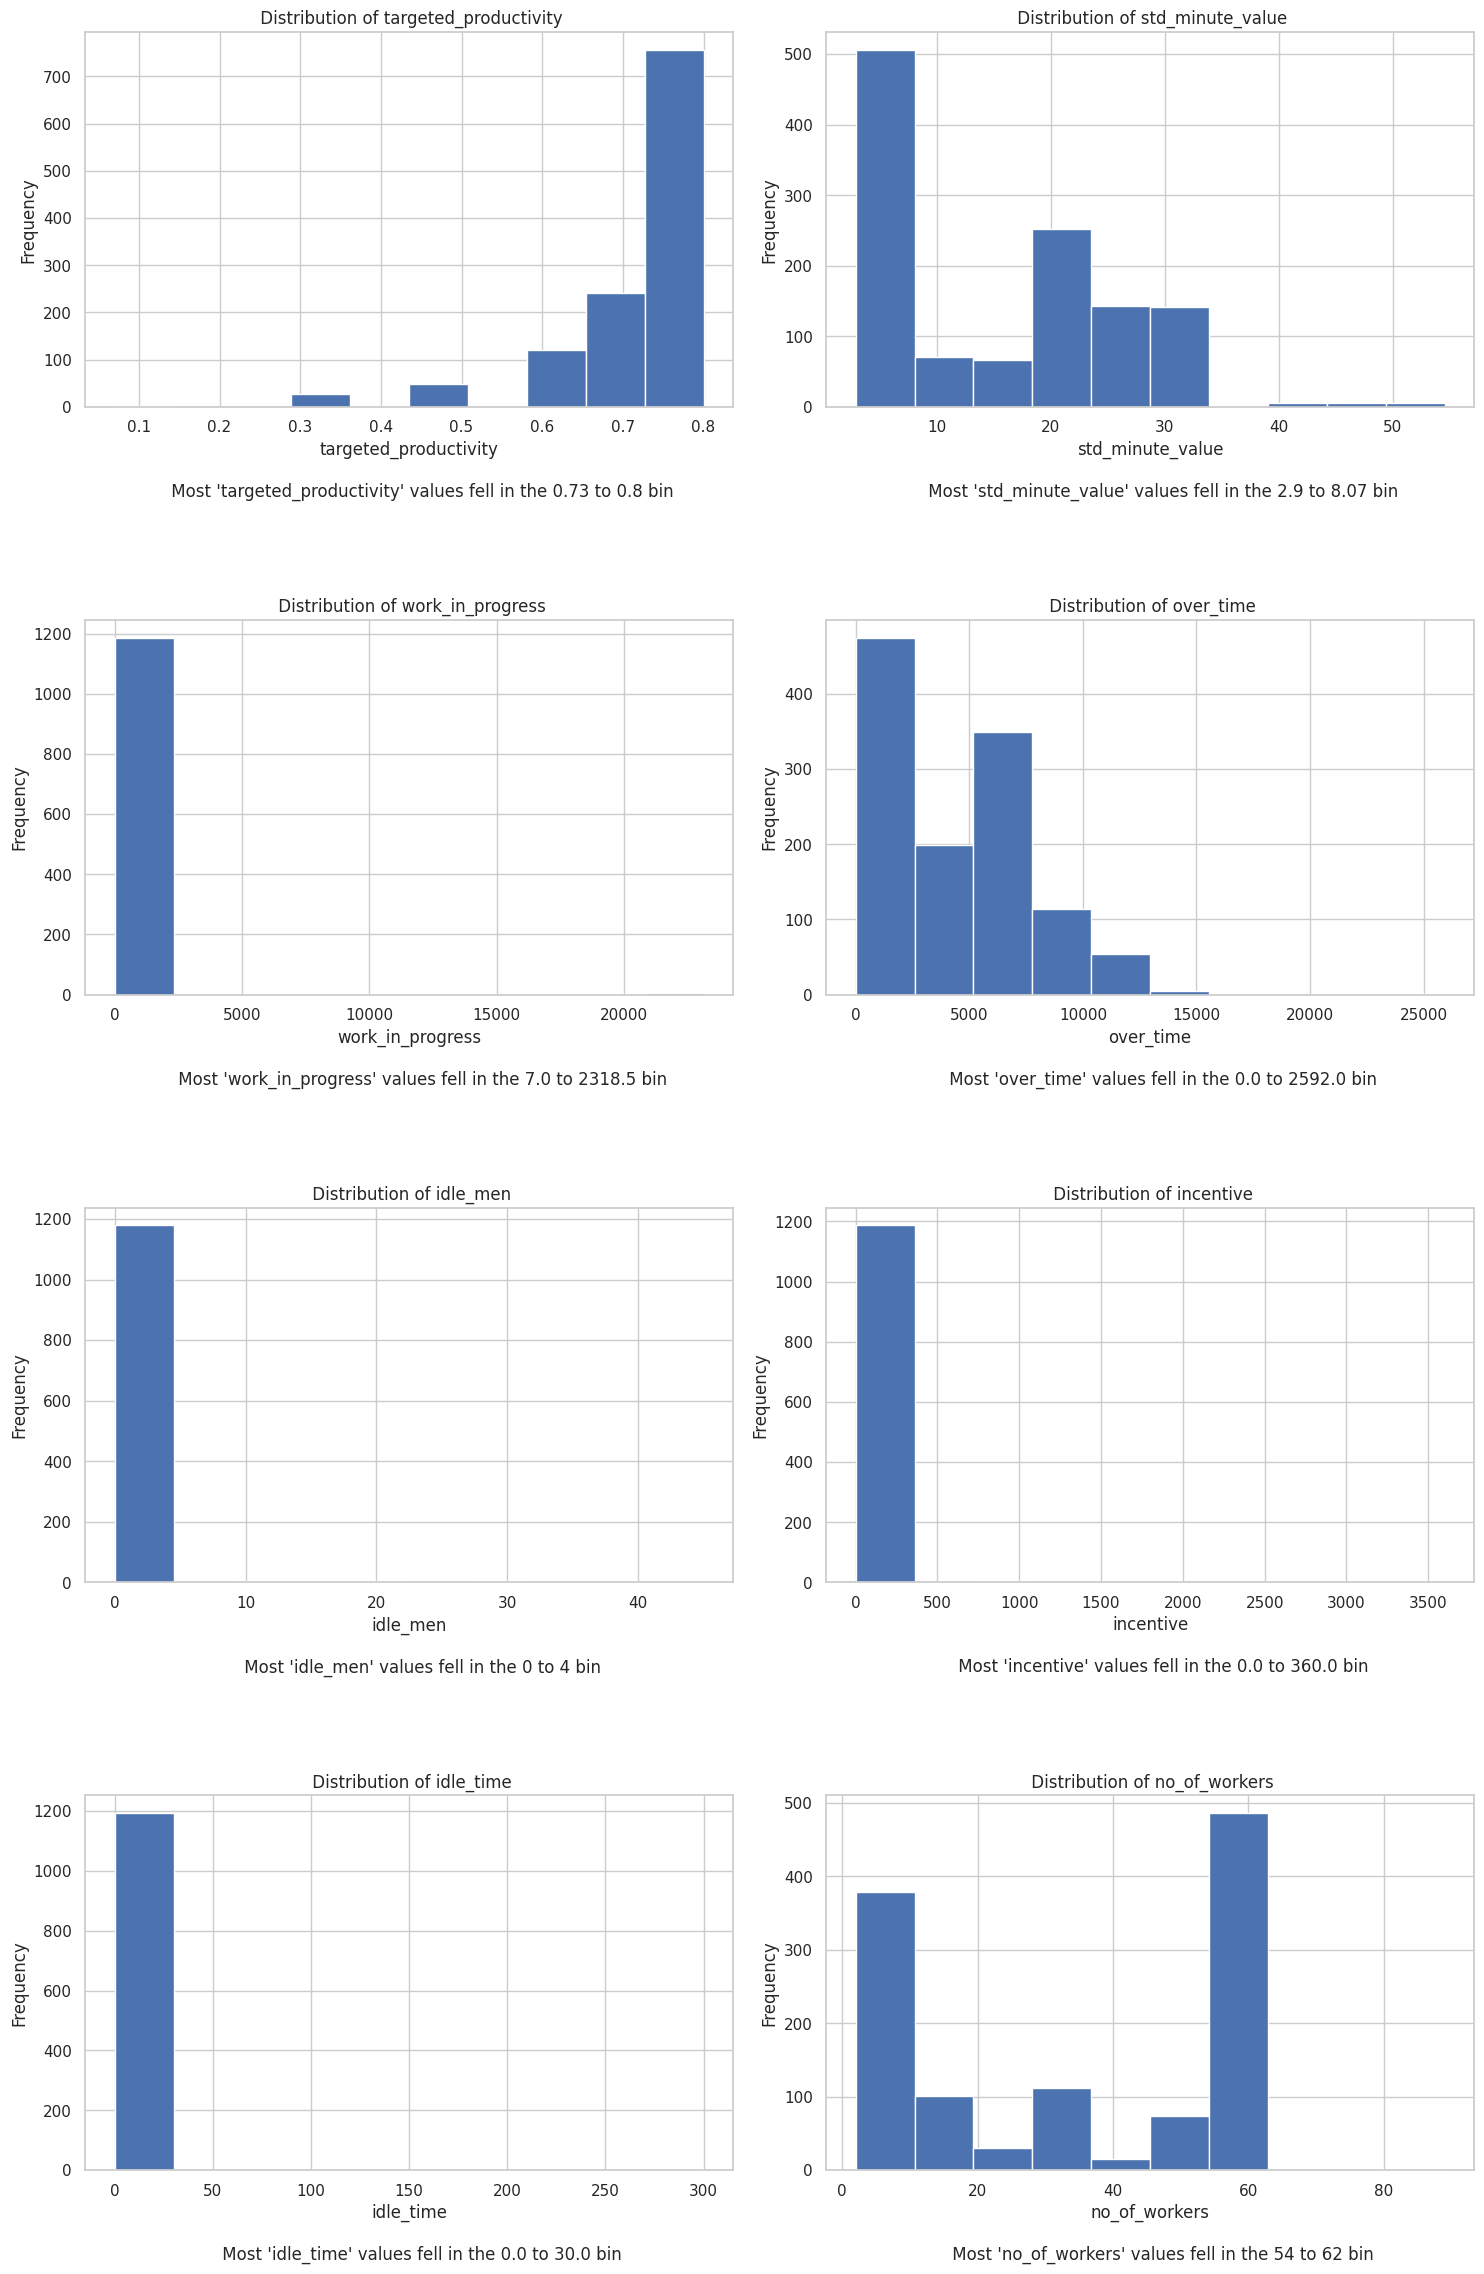

In [25]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, ax in enumerate(axes.ravel()):
    n, bins, patches = ax.hist(df[cont[i]], bins=10)
    max_bin_idx = np.argmax(n)
    left_edge, right_edge = bins[max_bin_idx], bins[max_bin_idx + 1]
    ax.set_title(f" Distribution of {cont[i]}")
    ax.set_ylabel("Frequency")
    ax.set_xlabel(f" Distribution of {cont[i]}")

    if cont[i] == 'no_of_workers' or cont[i] == 'idle_men':
      ax.set_xlabel(f'''{cont[i]}

     Most '{cont[i]}' values fell in the {int(left_edge)} to {int(right_edge)} bin''')
    else:
      ax.set_xlabel(f'''{cont[i]}

     Most '{cont[i]}' values fell in the {round(left_edge, 2)} to {round(right_edge, 2)} bin''')

fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()


## **Bivariate Analysis**

 **Analysing Actual productivity across quarters, departments, teams and day of weeks**

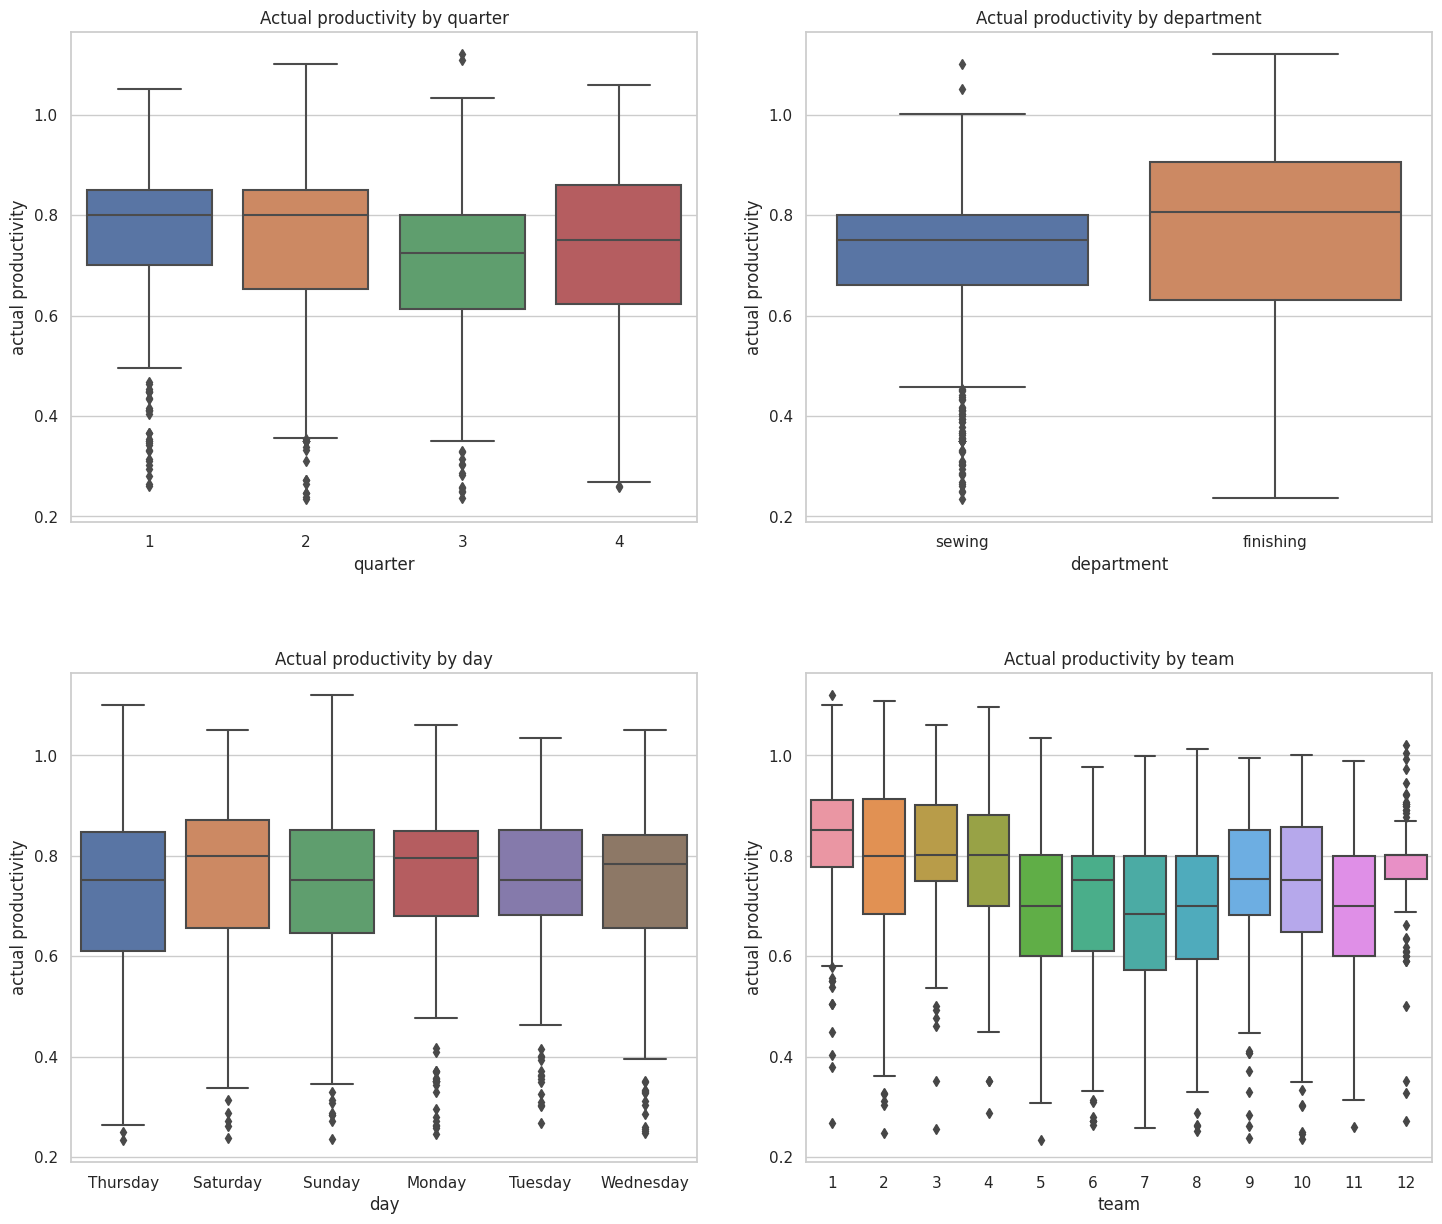

In [26]:
fig,axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8))

for i, ax in enumerate(axes.ravel()):

    sns.boxplot(data=df, x=cat[i], y='actual_productivity', ax=ax)
    ax.set_title(f"Actual productivity by {cat[i]}")
    ax.set_xlabel(cat[i])
    ax.set_ylabel("actual productivity")

fig.tight_layout()
plt.subplots_adjust(top=1.5,right=1.2)
plt.show()

Outcomes:
Observe highest median actual productivity in
* Quarter 1 and 2,
* Finishing department,
* on saturday
* Team 1

 ***Computing the average of standard minute value, over time, idle men, incentive, idle time, and number of workers by categorizing productivity as either greater than 0.5 or not.***

In [27]:
#function to group according to actual productivity levels
def categories(x):
  if x <= 0.5:
    return 'productivity <= 0.5'
  else:
    return 'productivity > 0.5'

df_cat = df.copy()
df_cat['actual_productivity_category'] = df['actual_productivity'].apply(lambda x: categories(x))

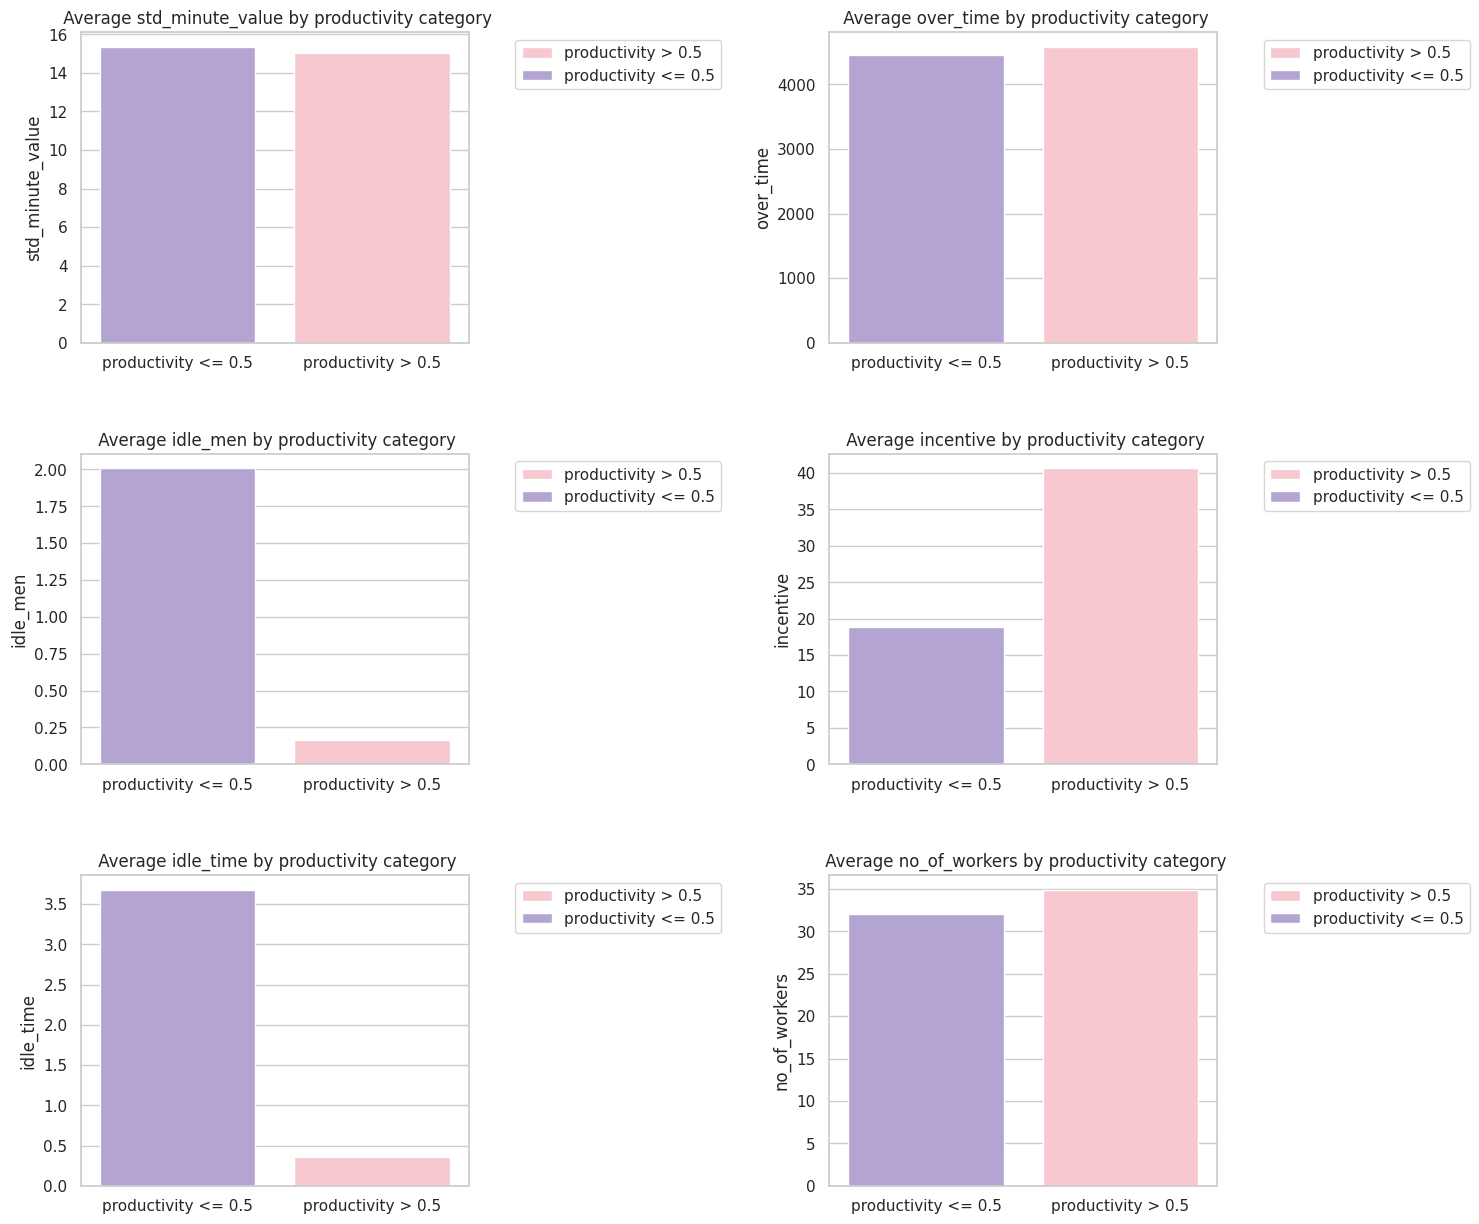

In [28]:
#plots


col_sel = ['std_minute_value', 'over_time', 'idle_men', 'incentive', 'idle_time', 'no_of_workers']

fig,axes = plt.subplots(nrows=3, ncols=2,figsize=(15,8))

for i, ax in enumerate(axes.ravel()):


    sns.barplot(x=df_cat['actual_productivity_category'], y=df_cat[col_sel[i]], errorbar=None, ax=ax,order=['productivity <= 0.5', 'productivity > 0.5'],
                hue=df_cat['actual_productivity_category'], dodge=False, palette=['pink','#B19CD9'])
    ax.set_title(f" Average {col_sel[i]} by productivity category")
    ax.set_xlabel("")
    ax.set_ylabel(col_sel[i])

    ax.legend(bbox_to_anchor=(1.1,1))

fig.tight_layout()

plt.subplots_adjust(top=1.5)
plt.show()

In the category where actual productivity levels are less than or equal to 0.5, observe elevated averages for standard minute value, idle time, and idle men. Conversely, in the category where actual productivity levels exceed 0.5, note higher averages for incentive, number of workers, and overtime.

**productivity and incenteive relatioship with respect to time**

<Figure size 1000x600 with 0 Axes>

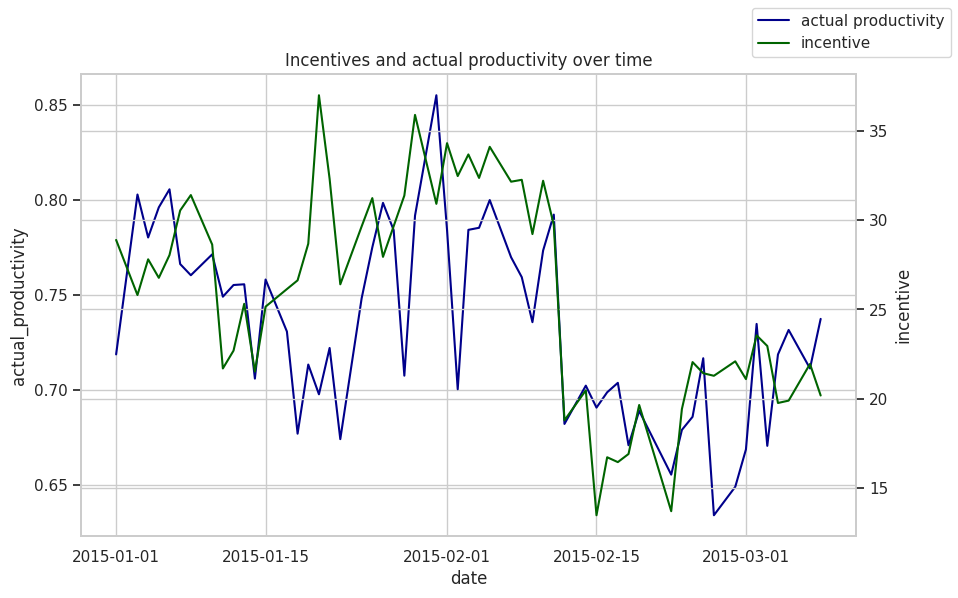

In [29]:
#examining trend of actual productivity and incentives
df_dt = df[df.date <= pd.to_datetime('2015-03-08')]
plt.figure(figsize=(10, 6))

plt.figure(figsize=(10,6))

line1 = sns.lineplot(x='date', y='actual_productivity', data=df_dt, errorbar= None, color='darkblue', legend=False, label = 'actual productivity' )

ax2 = line1.twinx()
line2 = sns.lineplot(x='date', y='incentive', data=df_dt, errorbar= None, color='darkgreen',ax=ax2, legend=False, label = 'incentive')

line1.figure.legend()

plt.title("Incentives and actual productivity over time")
plt.show()










Incentives and actual productivity tend to move in the same direction. When incentives are low, actual productivity is also low. When incentives are high, actual productivity is also high. but some times productivity is low even when incentives are high e.g. in march 2015 and at the end of january and start of Feb

***Department and team with more style changes***

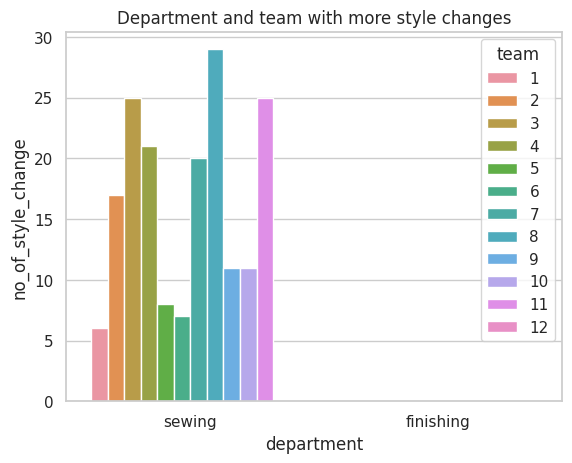

In [30]:
sns.barplot(x='department', y='no_of_style_change',hue ='team' ,data=df, errorbar= None, estimator=sum)
plt.title("Department and team with more style changes")
plt.show()

In sewing department team 8 has more style changes than team 3 and 11 where as there is no style changes in finishing department

***Average productivity of each team across the department***

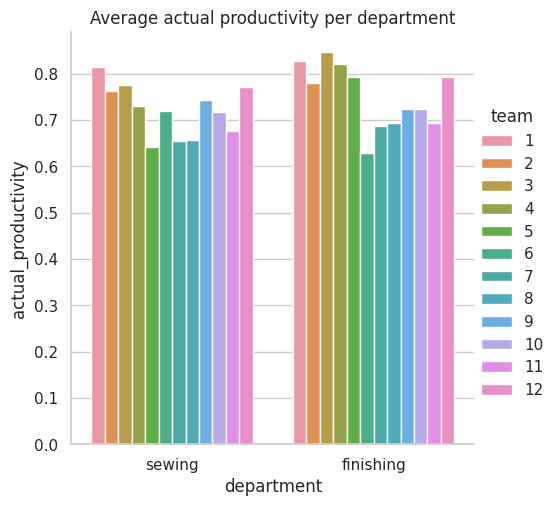

In [31]:
sns.catplot(data=df,x='department',y='actual_productivity',hue='team', errorbar=None, kind = 'bar')
plt.title("Average actual productivity per department")
plt.show()

In sewing department team 1 and 12 have highest average productivity where as in finishing department team 1 and 3 have highest average productivity

In [32]:
df[df.department == 'sewing'].groupby(['team','department'])['incentive'].mean().nsmallest(3)

team  department
7     sewing        27.109091
5     sewing        29.137931
8     sewing        31.285714
Name: incentive, dtype: float64

team 5, 7 and 8 has lowest incentive in sewing department and also has low productivity as shown in above figure as well

In [33]:
df[df.department == 'finishing'].groupby(['team','department'])['incentive'].mean().nsmallest(3)

team  department
6     finishing      0.000000
7     finishing      0.000000
8     finishing     18.113208
Name: incentive, dtype: float64

team 6,7,8 in finishing department recieved low incentives hence having low productivity depicted in above figure

In [12]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder objects for the "day" and "department" variables
day_encoder = LabelEncoder()
department_encoder = LabelEncoder()

# Encode the "day" and "department" variables
day_encoded = day_encoder.fit_transform(df['day'])
department_encoded = department_encoder.fit_transform(df['department'])
df_enc = df.copy()
# Add the encoded variables to the DataFrame
df_enc['day'] = day_encoded
df_enc['department'] = department_encoded
df_enc.head()

,date,quarter,department,day,team,targeted_productivity,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,1,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725
1,2015-01-01,1,0,3,1,0.75,3.94,1039.0,960,0,0.0,0,0,8,0.886500
2,2015-01-01,1,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
3,2015-01-01,1,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
4,2015-01-01,1,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382


<ipython-input-35-eab1df6db6d9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_enc.corr()


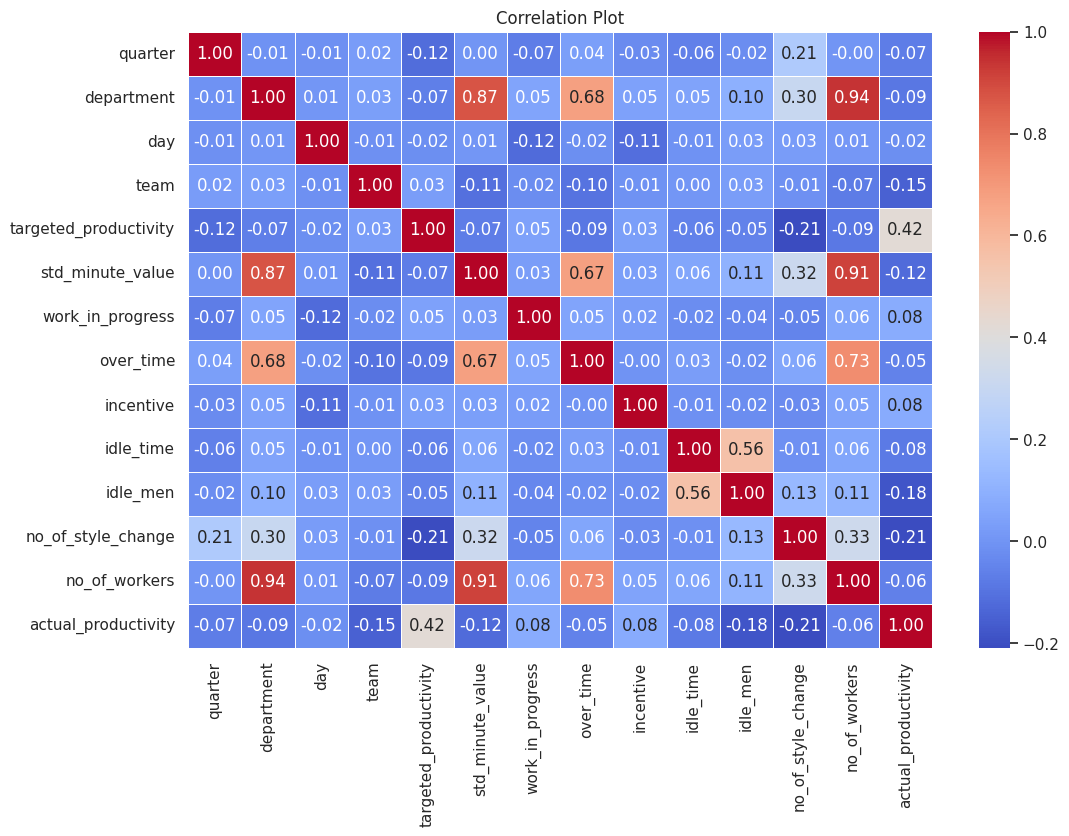

In [35]:
correlation_matrix = df_enc.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Plot')
plt.show()

* department and no of workers has strong positive correlation
* std_minute_value and department has strong positive correlation
* over time has correlation greater than 0.5 with department, std_minute_value and no of workers


<ipython-input-36-b81e787993e7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_enc.corr()


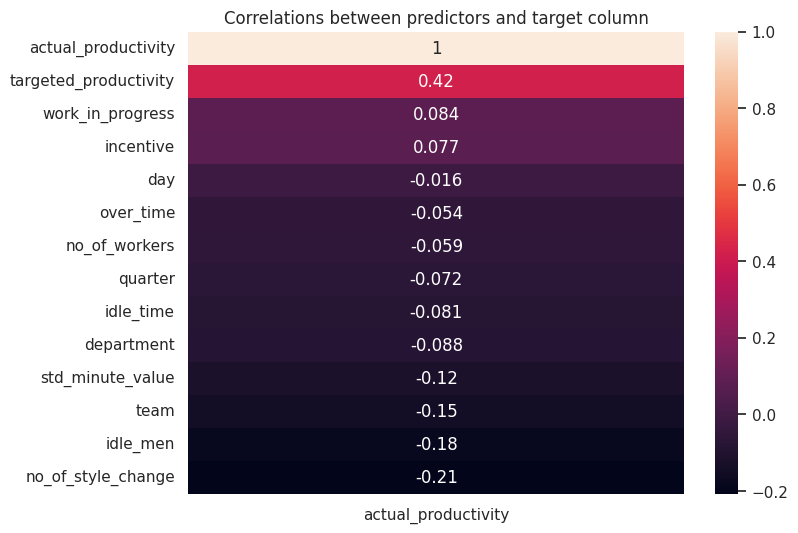

In [36]:
#plotting the correlation of predictors with target variable
corr = df_enc.corr()
target_col=corr[['actual_productivity']].sort_values(by='actual_productivity', ascending=False)

plt.figure(figsize=(8,6))

sns.heatmap(target_col,annot=True)
plt.title("Correlations between predictors and target column")
plt.show()

only targeted productivity has moderate level of correlation with target variable(actual_productivity). As correlation is a measure of linear dependency may be other predictors have non-linear relationship with target variable

## **Modelling**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [19]:
# droping the date column
df_enc.drop("date", inplace = True, axis =1)

In [20]:
# seperating the predictors and target variable
X = df_enc.drop("actual_productivity", axis = 1)
y = df_enc["actual_productivity"]


In [21]:
# Splitting dataset to train and test sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)


In [22]:
# scaling the data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [23]:
rmses = []

In [24]:
# fitting simple linear regression
#using scaled features


regression = LinearRegression()
regression.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = regression.predict(X_test_sc)

#evaluating model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmses.append((f'Baseline linear model RMSE: {rmse}'))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 0.02059692446115556
Root Mean Squared Error: 0.1435162863968949


***Verifying the assumptions of Linear rgression***

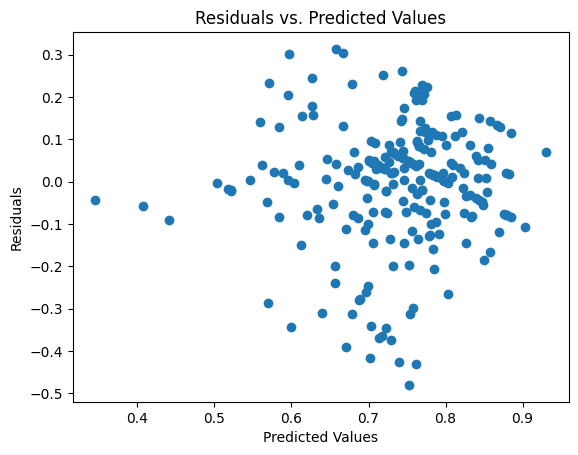

In [25]:
# verifying the assumptions of linear regression
# 1) Linearity
# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals vs. predicted values
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

It seems that there is some kind of uoward pattern in above plot indicating the voilation of Linearity assumption

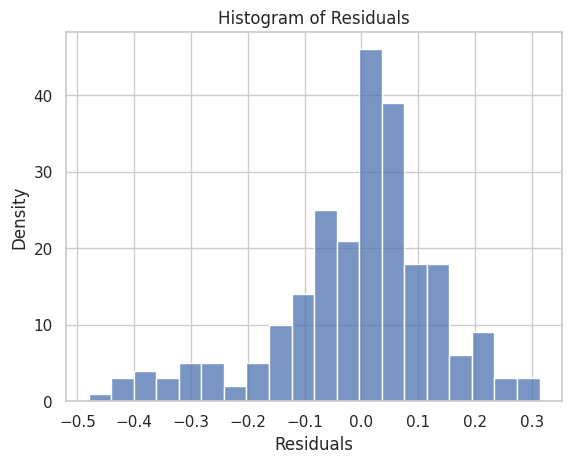

In [47]:
# Normality of errors


# Plot a histogram of the residuals
sns.histplot(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Histogram of Residuals")
plt.show()

Given the histogram's negative skewness, it deviates from the bell-shaped, normal distribution. Consequently, the normality assumption for residuals is not satisfied. To substantiate this observation, we can employ the Shapiro test for a statistical confirmation.

In [48]:
# importing the shapiro function
from scipy.stats import shapiro


# testing for normality. extracting statistic and p value
stat, p = shapiro(residuals)


# interpreting
alpha = 0.05
if p > alpha:
	print('Sample appears to have a normal distribution')
else:
	print('Sample does not appear to have a normal distribution')

Sample does not appear to have a normal distribution


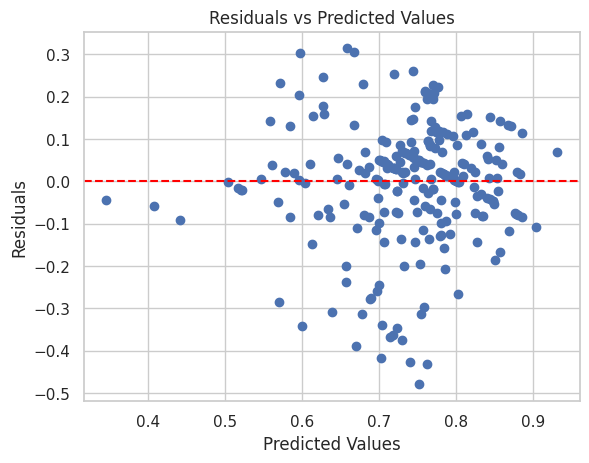

In [49]:
# Homoskedasticity
# Plot residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

The plot above suggest the hetroskedasticity as shows pattern around the mean of residuals(around 0) we can further confirm it using Levene's test

In [50]:
from scipy.stats import levene
statistic, p = levene(y_pred, residuals)
if p < 0.05:
  print("the variances are not homogenous")

else:
  print("variances are homogenous")


the variances are not homogenous


In [52]:
X

,quarter,department,day,team,targeted_productivity,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,1,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59
1,1,0,3,1,0.75,3.94,1039.0,960,0,0.0,0,0,8
2,1,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30
3,1,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30
4,1,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2,0,5,10,0.75,2.90,1039.0,960,0,0.0,0,0,8
1193,2,0,5,8,0.70,3.90,1039.0,960,0,0.0,0,0,8
1194,2,0,5,7,0.65,3.90,1039.0,960,0,0.0,0,0,8
1195,2,0,5,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15


In [59]:
# Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'X' is your DataFrame containing predictors
# Add a constant term to the predictors for intercept
X_with_constant = add_constant(X)

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

# Display the VIF data
print(vif_data)

                 Variable        VIF
0                   const  80.834475
1                 quarter   1.083360
2              department   9.586637
3                     day   1.032372
4                    team   1.134923
5   targeted_productivity   1.069217
6        std_minute_value   6.236269
7        work_in_progress   1.035206
8               over_time   2.478658
9               incentive   1.026336
10              idle_time   1.484547
11               idle_men   1.529521
12     no_of_style_change   1.378727
13          no_of_workers  14.425969


Variables having vif > 5 suffers from multicolinearity specially no of workers and department having large value of vif

Given that the assumptions of a linear regression model are not satisfied, it suggests that this model, which primarily captures linear relationships between predictors and the response variable, may not be the most suitable. To explore alternative approaches, machine learning models can be considered. Unlike linear regression, these models don't impose specific assumptions on the data and are adept at capturing nonlinear relationships.

### **Machine Learning Models**
* KNN
* Random Forest
* Support Vector Regression
* Gradient Boosting
* LightGBM

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import  GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb

#performing gridsearch for hyperparameters tuning
# knn
estimator_knn = KNeighborsRegressor()
param_grid_knn ={ "n_neighbors": range(2,101,2),
"metric": ["manhattan","minkowski"],
"weights": ["uniform", "distance"] }

gscv_knn = GridSearchCV(estimator=estimator_knn,param_grid=param_grid_knn)
gscv_knn.fit(X_train_sc,y_train)
print("KNN: Best : %f using: %s" % (gscv_knn.best_score_,gscv_knn.best_params_))

# rf
estimator_rf  = RandomForestRegressor(random_state = 0)
param_grid_rf = {'n_estimators': np.arange(50, 500, 50),
              'min_samples_split': np.arange(5, 30, 5),
              'max_depth': np.arange(2,7) }

gscv_rf = GridSearchCV(estimator=estimator_rf,param_grid=param_grid_rf)
gscv_rf.fit(X_train,y_train)
print("RF: Best : %f using: %s" % (gscv_rf.best_score_,gscv_rf.best_params_))

#gradient boosting
param_grid_gb = {'n_estimators': np.arange(100, 500, 100),
              'learning_rate': [0.01, 0.1, 1],
              'max_depth': np.arange(2,7)}
estimator_gb = GradientBoostingRegressor(random_state=0)

#finding values
gscv_gb = GridSearchCV(estimator= estimator_gb, param_grid=param_grid_gb,scoring='neg_mean_squared_error')
gscv_gb.fit(X_train,y_train)
print("GB: Best : %f using: %s" % (gscv_gb.best_score_,gscv_gb.best_params_))

# LightGBM
param_grid_lgb = {"boosting_type": ["gbdt", "dart", "rf"],
               'n_estimators': np.arange(50, 500, 50),
              'learning_rate': [0.01, 0.1, 1],
              'max_depth': np.arange(2,7)}
estimator_lgb = lgb.LGBMRegressor(random_state=0)
gscv_lgb = GridSearchCV(estimator= estimator_lgb, param_grid=param_grid_lgb,scoring='neg_mean_squared_error')
gscv_lgb.fit(X_train,y_train)
print("LGBM: Best : %f using: %s" % (gscv_lgb.best_score_,gscv_lgb.best_params_))

Since tree-based methods are generally insensitive to the scale of the features, we have not applied feature scaling for the gridsearch procedure."

In [62]:
print("KNN: Best : %f using: %s" % (gscv_knn.best_score_,gscv_knn.best_params_))

# rf

print("RF: Best : %f using: %s" % (gscv_rf.best_score_,gscv_rf.best_params_))

#gradient boosting

print("GB: Best : %f using: %s" % (gscv_gb.best_score_,gscv_gb.best_params_))

# LightGBM

print("LGBM: Best : %f using: %s" % (gscv_lgb.best_score_,gscv_lgb.best_params_))

KNN: Best : 0.202532 using: {'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'distance'}
RF: Best : 0.462526 using: {'max_depth': 6, 'min_samples_split': 10, 'n_estimators': 250}
GB: Best : -0.015899 using: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
LGBM: Best : -0.015993 using: {'boosting_type': 'gbdt', 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 450}


In [31]:
from sklearn.svm import SVR
# define the SVR model
svr_model = SVR(kernel='rbf')

# specify the hyperparameter search space
hyperparameters = {
    'C': [0.01,0.1,0.3,0.5,1,3,5,10,20,30,40,50,60,70,80,90,100],
    'epsilon': [ 0.001,0.005,0.01, 0.05,0.1, 0.2,0.3,0.5,1],
    'gamma': [0.001,0.005,0.01,0.05,0.1,0.3,0.5,0.8,1]
}

# create a time series split for cross-validation

grid_search = GridSearchCV(svr_model, hyperparameters)
grid_search.fit(X_train_sc, y_train)
print("Best : %f using: %s" % (grid_search.best_score_,grid_search.best_params_))

Best : 0.389043 using: {'C': 1, 'epsilon': 0.001, 'gamma': 0.05}


In [32]:
#defining model with the best hyperparameters obtained from gridsearch

knn = KNeighborsRegressor(metric = "manhattan", n_neighbors= 8, weights= "distance")
rf = RandomForestRegressor(n_estimators = 250, max_depth = 6 ,min_samples_split = 10, random_state = 0)
GB = GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, max_depth = 2, random_state = 0)
lgbm = lgb.LGBMRegressor(n_estimators = 450, boosting_type = "gbdt", learning_rate = 0.01, max_depth = 4, random_state = 0)
svr =  SVR(kernel = "rbf", C= 1, epsilon = 0.001, gamma = 0.05)


In [ ]:
# Train the model
knn.fit(X_train_sc, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_sc)

# Evaluate the model (you may want to use metrics like Mean Squared Error)

mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
print(f'Mean Squared Error for knn: {mse_knn}')
print(f'root Mean Squared Error for knn: {rmse_knn}')
rmses.append((f'KNN RMSE: {rmse_knn}'))
# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model (you may want to use metrics like Mean Squared Error)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f'Mean Squared Error for rf: {mse_rf}')
print(f'root Mean Squared Error for rf: {rmse_rf}')
rmses.append((f'RF RMSE: {rmse_rf}'))
# Train the model
GB.fit(X_train, y_train)

# Make predictions on the test set
y_pred_GB = GB.predict(X_test)

# Evaluate the model (you may want to use metrics like Mean Squared Error)

mse_GB = mean_squared_error(y_test, y_pred_GB)
rmse_GB = np.sqrt(mse_GB)
print(f'Mean Squared Error for GB: {mse_GB}')
print(f'root Mean Squared Error for GB: {rmse_GB}')
rmses.append((f'GB RMSE: {rmse_GB}'))
# Train the model
lgbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgbm = lgbm.predict(X_test)

# Evaluate the model (you may want to use metrics like Mean Squared Error)

mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
print(f'Mean Squared Error for LGBM: {mse_lgbm}')
print(f'root Mean Squared Error for LGBM: {rmse_lgbm}')
rmses.append((f'LGBM RMSE: {rmse_lgbm}'))
# Train the model
svr.fit(X_train_sc, y_train)

# Make predictions on the test set
y_pred_svr = svr.predict(X_test_sc)

# Evaluate the model (you may want to use metrics like Mean Squared Error)

mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
print(f'Mean Squared Error for SVR: {mse_svr}')
print(f'root Mean Squared Error for SVR: {rmse_svr}')
rmses.append((f'SVR RMSE: {rmse_svr}'))



In [36]:
rmses

['Baseline linear model RMSE: 0.1435162863968949',
 'KNN RMSE: 0.13782722596174368',
 'RF RMSE: 0.12215132002791813',
 'GB RMSE: 0.12229222163173513',
 'LGBM RMSE: 0.12125503351227808',
 'SVR RMSE: 0.13804071528920608']

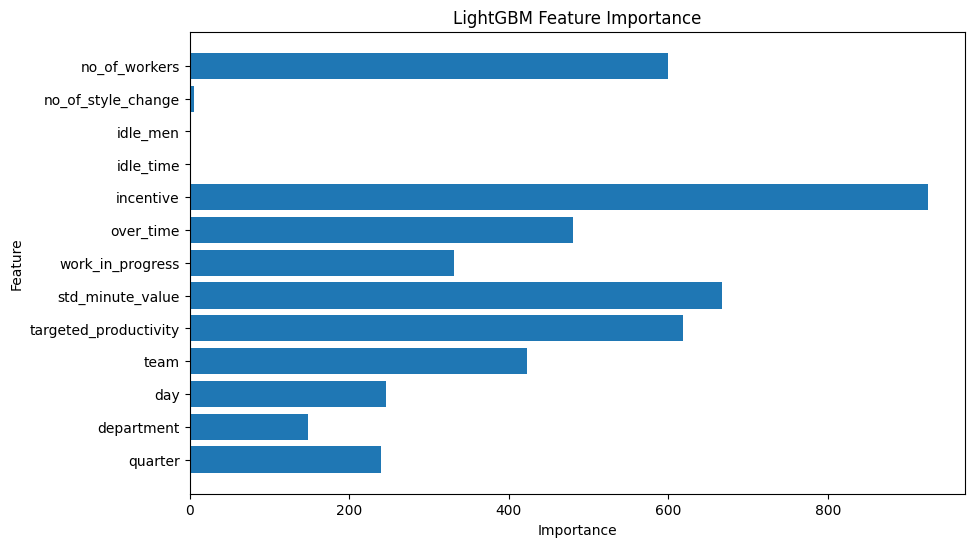

In [40]:
# As LightGBM has lowest rmse which is 0.121 so we pick LightGBM as our final model
# now looking for feature importance
# Plot feature importance
feature_importance = lgbm.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, align='center')
plt.title('LightGBM Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [20]:
# dropping the features with less importance and again tuning the hyperparameters

X_imp = df_enc.drop(["actual_productivity","no_of_style_change","idle_men", "idle_time", "department", "date"], axis = 1)
y_imp = df_enc["actual_productivity"]
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, test_size = .2, random_state=0)

In [ ]:
#Fitting the final model with important features and tuned parameters
lgbm_imp = lgb.LGBMRegressor(boosting_type ='gbdt' , n_estimators= 450, learning_rate =0.01 , max_depth = 4, random_state =0)
lgbm_imp.fit(X_train_imp, y_train_imp)
final_pred = lgbm_imp.predict(X_test_imp)
mse_final = mean_squared_error(y_test_imp,final_pred)
rmse_final = np.sqrt(mse_final)
print(f'Mean Squared Error of final LGBM: {mse_final}')
print(f'root Mean Squared Error of final LGBM: {rmse_final}')


In [31]:
print(f'Mean Squared Error of final LGBM: {mse_final}')
print(f'root Mean Squared Error of final LGBM: {rmse_final}')

Mean Squared Error of final LGBM: 0.014701741952396914
root Mean Squared Error of final LGBM: 0.12125074000762599


## **Conclusion**

Project goals have been met successfully, with the optimal model identified as LightGBM achieving an RMSE of 0.121. The model was fine-tuned with specific parameters: boosting type 'gbdt', 450 estimators, learning rate of 0.01, maximum depth of 4, and a random state of 0. Key predictors influencing actual productivity include incentive, targeted productivity, number of workers, and overtime. The exploration of the relationship between actual productivity and its predictors was thoroughly examined during the exploratory data analysis (EDA) phase.

## **Recommendations**


* Team management should establish clear, challenging, and attainable daily goals for each team in the industry.

* Targeted productivity, identified as a key feature in modeling, exhibited a moderate positive correlation with actual productivity.

* Incentives play a crucial role in motivating teams to enhance their performance, as evidenced by higher average incentives in categories with productivity exceeding 0.5.

* For the sewing department, it is advisable for the management of the least performing teams (5, 7, and 8) to consider offering enhanced incentives for increased motivation. Additionally, investigating the causes of high idle time, such as potential machine breakdowns, is recommended.

* In the finishing department, a similar recommendation is made for teams with lower performance (6, 7, 8). Teams 6 and 7, in particular, had exceptionally low average incentives, warranting attention and potential adjustment.